In [1]:
import re
import pandas as pd
import numpy as np
import subprocess
import wget
import re
import matplotlib.pyplot as plt
import cv2
import glob
from tqdm import tqdm

14 = Leaf nitrogen (N) content per leaf dry mass<br>
3110 = leaf area

In [2]:
data = pd.read_csv('TRY_final.txt', sep=',', encoding='latin-1')
data.head()

,AccSpeciesName,mean_14,mean_3117,mean_3106,mean_4,mean_3110,mean_26,stddev_14,stddev_3117,stddev_3106,stddev_4,stddev_3110,stddev_26,PlantGrowthForm
0,Aa,26.400000,9.433962,NaN,NaN,NaN,NaN,0.000000,2.832447e-11,NaN,NaN,NaN,NaN,NaN
1,Aaronsohnia pubescens,NaN,NaN,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABACABA (PALM),NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,8.485281,NaN,NaN,NaN,NaN
3,Abarema adenophora,24.422045,11.820481,NaN,0.663459,56861.99,NaN,1.593152,1.030987e+00,NaN,0.132959,NaN,NaN,tree
4,Abarema adenophorum,NaN,NaN,NaN,0.360000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN


In [3]:
links = pd.read_csv('species_links.txt', sep=',', encoding='latin-1')
links.head()

,gbifID,identifier,species,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,bio1,bio2,bio3,bio4,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,891019180,https://static.inaturalist.org/photos/73239/or...,Polypodium virginianum,41.310674,-72.513289,NaN,103.0,102.0,29.0,8513.0,...,211.0,-8.0,1182.0,113.0,89.0,8.0,316.0,278.0,278.0,291.0
1,891019180,https://static.inaturalist.org/photos/73240/or...,Polypodium virginianum,41.310674,-72.513289,NaN,103.0,102.0,29.0,8513.0,...,211.0,-8.0,1182.0,113.0,89.0,8.0,316.0,278.0,278.0,291.0
2,891019290,https://static.inaturalist.org/photos/80340/or...,Pastinaca sativa,44.002331,-73.169975,5.0,72.0,120.0,29.0,10014.0,...,196.0,-64.0,891.0,103.0,49.0,20.0,273.0,159.0,273.0,166.0
3,891019325,https://static.inaturalist.org/photos/82422/or...,Datura metel,16.023604,-16.489864,NaN,251.0,111.0,62.0,2229.0,...,280.0,226.0,269.0,101.0,0.0,153.0,234.0,0.0,217.0,3.0
4,891019575,https://static.inaturalist.org/photos/97085/or...,Polypodium virginianum,44.032032,-73.085672,5.0,61.0,117.0,28.0,9885.0,...,184.0,-72.0,1012.0,114.0,56.0,19.0,306.0,183.0,306.0,193.0


In [4]:
combined = pd.merge(data, links, left_on='AccSpeciesName', right_on='species', how='inner')
combined.head()

,AccSpeciesName,mean_14,mean_3117,mean_3106,mean_4,mean_3110,mean_26,stddev_14,stddev_3117,stddev_3106,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,Abarema brachystachya,30.400000,NaN,10.000000,0.537852,NaN,NaN,0.000000,NaN,NaN,...,250.0,182.0,1863.0,252.0,88.0,36.0,730.0,285.0,730.0,285.0
1,Abarema macradenia,23.394909,8.319237,31.670558,0.438332,16535.0,90.0,0.000000,0.129421,0.679612,...,266.0,246.0,3760.0,675.0,60.0,60.0,1648.0,217.0,650.0,1314.0
2,Abarema macradenia,23.394909,8.319237,31.670558,0.438332,16535.0,90.0,0.000000,0.129421,0.679612,...,266.0,246.0,3760.0,675.0,60.0,60.0,1648.0,217.0,650.0,1314.0
3,Abatia parviflora,24.400000,NaN,NaN,NaN,NaN,NaN,3.818377,NaN,NaN,...,123.0,115.0,926.0,121.0,34.0,35.0,297.0,141.0,281.0,188.0
4,Abatia parviflora,24.400000,NaN,NaN,NaN,NaN,NaN,3.818377,NaN,NaN,...,123.0,115.0,926.0,121.0,34.0,35.0,297.0,141.0,281.0,188.0


In [5]:
#combined = combined.drop_duplicates(subset='AccSpeciesName', keep="first")
combined = combined[combined['mean_3110'].notna()]
combined = combined.drop_duplicates(subset='identifier', keep="first")
combined.head()

,AccSpeciesName,mean_14,mean_3117,mean_3106,mean_4,mean_3110,mean_26,stddev_14,stddev_3117,stddev_3106,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
1,Abarema macradenia,23.394909,8.319237,31.670558,0.438332,16535.000000,90.000000,0.000000,0.129421,0.679612,...,266.0,246.0,3760.0,675.0,60.0,60.0,1648.0,217.0,650.0,1314.0
2,Abarema macradenia,23.394909,8.319237,31.670558,0.438332,16535.000000,90.000000,0.000000,0.129421,0.679612,...,266.0,246.0,3760.0,675.0,60.0,60.0,1648.0,217.0,650.0,1314.0
229,Abies alba,13.095739,7.846480,47.975610,0.499512,18.921429,70.544591,2.731756,2.738197,15.637276,...,143.0,-18.0,1184.0,112.0,83.0,8.0,323.0,276.0,302.0,319.0
230,Abies alba,13.095739,7.846480,47.975610,0.499512,18.921429,70.544591,2.731756,2.738197,15.637276,...,143.0,-18.0,1184.0,112.0,83.0,8.0,323.0,276.0,302.0,319.0
231,Abies alba,13.095739,7.846480,47.975610,0.499512,18.921429,70.544591,2.731756,2.738197,15.637276,...,143.0,-18.0,1184.0,112.0,83.0,8.0,323.0,276.0,302.0,319.0


In [6]:
# combined = combined.drop_duplicates(subset='AccSpeciesName', keep="first")
# combined.shape

In [7]:
g = combined.groupby(['AccSpeciesName', 'identifier']).size().reset_index()
unique_species = g['AccSpeciesName'].unique()
g.head(20)


,AccSpeciesName,identifier,0
0,Abarema macradenia,https://static.inaturalist.org/photos/73222931...,1
1,Abarema macradenia,https://static.inaturalist.org/photos/73222955...,1
2,Abies alba,https://static.inaturalist.org/photos/11080740...,1
3,Abies alba,https://static.inaturalist.org/photos/11080742...,1
4,Abies alba,https://static.inaturalist.org/photos/11080745...,1
5,Abies alba,https://static.inaturalist.org/photos/11080748...,1
6,Abies alba,https://static.inaturalist.org/photos/11080878...,1
7,Abies alba,https://static.inaturalist.org/photos/11080881...,1
8,Abies alba,https://static.inaturalist.org/photos/11080885...,1
9,Abies alba,https://static.inaturalist.org/photos/11080887...,1


In [8]:
unique_species.shape

(1658,)

In [9]:
np.savetxt("unique_species_names.txt", unique_species, fmt='%s')

In [10]:
base_url = 'https://inaturalist-open-data.s3.amazonaws.com/photos/'
for specie in tqdm(unique_species):
    links = list(g.loc[g['AccSpeciesName'] == specie, 'identifier'])[:15]
    for vals in range(len(links)):
        try:
            val = re.findall(r'\d+', links[vals])
            url = base_url + val[0] +'/small.jpg' if len(val) == 1 else base_url + val[0] +'/small.jpg?' + val[1]
            wget.download(url, out='images/'+specie+str(vals)+'.jpg')
        except:
            continue

100%|██████████| 1658/1658 [1:02:14<00:00,  2.25s/it]


In [8]:
sum(count_dict.values())

584

In [11]:
len(glob.glob('images/*'))

11270

In [5]:
base_url = 'https://inaturalist-open-data.s3.amazonaws.com/photos/'
main_dict = dict()
for link in tqdm(range(len(links['identifier']))):

    try:
        specie = links['species'][link]
        val = re.findall(r'\d+', links['identifier'][link])
        url = base_url + val[0] +'/small.jpg' if len(val) == 1 else base_url + val[0] +'/small.jpg?' + val[1]
        
        if not pd.isna(data.loc[data['AccSpeciesName'] == specie, 'mean_3110']).bool():
            if not specie in main_dict.keys():
                wget.download(url, out='images/'+specie+'.jpg')
                main_dict[specie] = [specie+'.jpg', data.loc[data['AccSpeciesName'] == specie, 'mean_3110']]
    except:
        continue

https://static.inaturalist.org/photos/73239/original.jpg?1444445542


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49572 entries, 0 to 49571
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AccSpeciesName   49572 non-null  object 
 1   mean_14          11310 non-null  float64
 2   mean_3117        12001 non-null  float64
 3   mean_3106        23951 non-null  float64
 4   mean_4           9484 non-null   float64
 5   mean_3110        2250 non-null   float64
 6   mean_26          26119 non-null  float64
 7   stddev_14        8956 non-null   float64
 8   stddev_3117      8215 non-null   float64
 9   stddev_3106      15042 non-null  float64
 10  stddev_4         8547 non-null   float64
 11  stddev_3110      1642 non-null   float64
 12  stddev_26        24610 non-null  float64
 13  PlantGrowthForm  25634 non-null  object 
dtypes: float64(12), object(2)
memory usage: 5.3+ MB


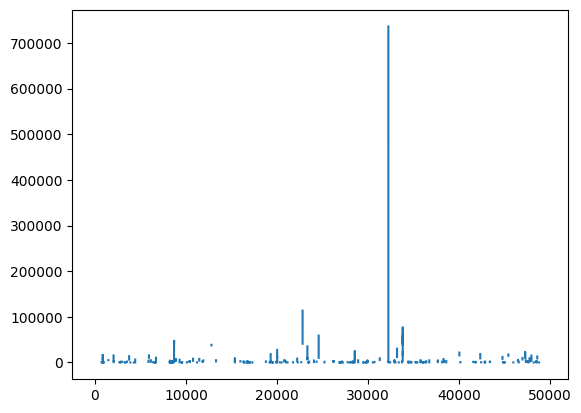

In [7]:
plt.plot(data['mean_3110'])
plt.show()

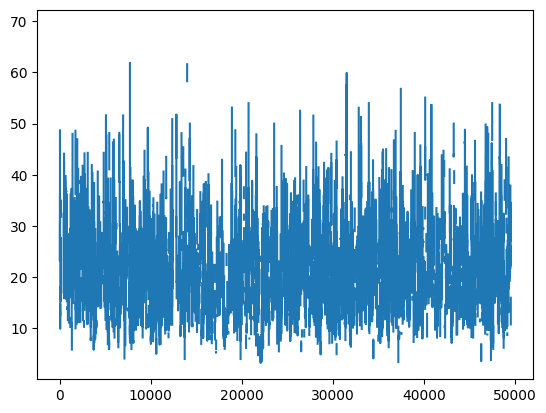

In [9]:
plt.plot(data['mean_14'])
plt.show()

In [10]:
img = cv2.imread("images/Sagittaria latifolia.jpg")


In [11]:
img.shape

(403, 500, 3)

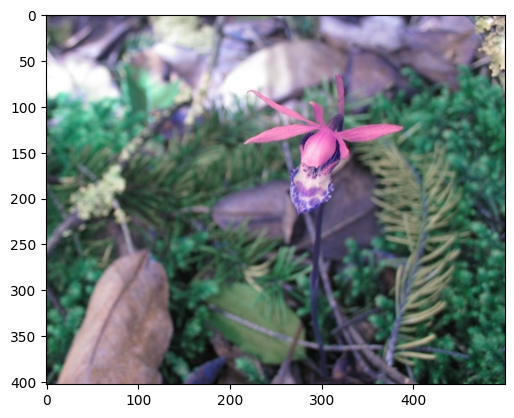

In [12]:
plt.imshow(img)
plt.show()

In [14]:
for image in glob.glob("images/*.jpg"):
    img = cv2.resize(img, [224, 224])
    

images/Pastinaca sativa.jpg
